# <center>Mini Projet Probléme sac a dos : Lansari Manel 2IDSD1</center>

# 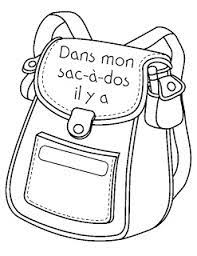

In [167]:
!pip install docplex 
# docplex +> IBM Decision Optimization CP Optimizer Modeling for Python

In [168]:
# importation des bibiliotheques 
from docplex.mp.model import Model#pour les insytuctions cplex
import numpy as np
import csv # biblio utilusation csv
import time
import random # pour algo randomisè

In [169]:
with open("Résultat.csv", "w") as f_write: # créer et ouvrir le fichier Resultat.csv
    writer = csv.writer(f_write, delimiter=";")# spécifier le délimiteur des colonnes
    writer.writerow( ["instance","objectif","temps(s)"] )#écrire les noms des colonnes dans Resultat.csv
    liste=open("all.txt", "r")# ouvrir la liste des instances
    nb_inst = liste.readline()# lire le nombre des instances à résoudre
    print("Nombre instance=", int(nb_inst))#affichage du nombre des instances à résoudre pour vérification
    for j in range(1): #boucle pour lire et résoudre les instances une par une
        inst = liste.readline()#lire le nom de l'instance j à résoudre
        #pour toutes les ligne dans all.txt, le nom de l'instance est sauvgardé dans la chaine inst suivit 
        #du caractère de fin de ligne \n sauf pour la dernière ligne d'ou il faut enlever ce \n
        if j < int(nb_inst)-1: #vérifier si ce n'est pas la dernière ligne dans all.txt
            inst=inst[:-1]#prebdre toute la chaine sauf le dernier caractère (le \n)
            print('Nom instance : ', inst)
        with open(inst) as f: #ouvrir l'instance lue
            N = int(f.readline())# lire le nombre d'objet et le sauvgarder dans la variable N
            print("Nombre d'objet = ", N) # nombre objet 
            Capacite = int(f.readline())# lire la capacité du sac et la sauvgarder dans la variable capacite
            volume= {}#déclaration d'un tableau pour les volumes des objets
            Profit = {}#déclaration d'un tableau pour les profits des objets
            for i in range(N):#remplir les tableau Profit et Volume
                Profit[i], volume[i] = [int(x) for x in next(f).split()]# La méthode split() divise une chaîne en une liste
                                                             
        print('volume = ', volume)
        print('Profit = ', Profit)
        #fichier.close()
    liste.close()# fermer le fichier liste des instances
#results.close()

Nombre instance= 25
Nom instance :  test100-SC(1).txt
Nombre d'objet =  100
volume =  {0: 85, 1: 94, 2: 26, 3: 6, 4: 48, 5: 16, 6: 21, 7: 92, 8: 22, 9: 49, 10: 95, 11: 37, 12: 43, 13: 57, 14: 45, 15: 15, 16: 55, 17: 46, 18: 52, 19: 22, 20: 9, 21: 91, 22: 1, 23: 59, 24: 22, 25: 67, 26: 94, 27: 98, 28: 38, 29: 7, 30: 74, 31: 44, 32: 15, 33: 34, 34: 82, 35: 66, 36: 67, 37: 94, 38: 84, 39: 93, 40: 99, 41: 33, 42: 33, 43: 31, 44: 82, 45: 28, 46: 72, 47: 100, 48: 74, 49: 17, 50: 38, 51: 74, 52: 56, 53: 20, 54: 45, 55: 19, 56: 95, 57: 94, 58: 29, 59: 96, 60: 99, 61: 97, 62: 77, 63: 16, 64: 97, 65: 8, 66: 19, 67: 39, 68: 42, 69: 7, 70: 7, 71: 69, 72: 22, 73: 37, 74: 70, 75: 31, 76: 98, 77: 26, 78: 100, 79: 87, 80: 45, 81: 72, 82: 67, 83: 13, 84: 72, 85: 81, 86: 95, 87: 43, 88: 13, 89: 58, 90: 48, 91: 3, 92: 87, 93: 64, 94: 23, 95: 36, 96: 29, 97: 24, 98: 74, 99: 89}
Profit =  {0: 95, 1: 104, 2: 36, 3: 16, 4: 58, 5: 26, 6: 31, 7: 102, 8: 32, 9: 59, 10: 105, 11: 47, 12: 53, 13: 67, 14: 55, 15: 2

In [170]:
print('Nombre objet:',N)

Nombre objet: 100


In [171]:
print('Nombre Profit elements:',len(Profit))

Nombre Profit elements: 100


In [172]:
print('Nombre volume elements:',len(volume))

Nombre volume elements: 100


In [173]:
print('la capacitè:',Capacite)

la capacitè: 101


In [174]:
listProfit=list(Profit.items())
print('la liste de profit:',listProfit)

la liste de profit: [(0, 95), (1, 104), (2, 36), (3, 16), (4, 58), (5, 26), (6, 31), (7, 102), (8, 32), (9, 59), (10, 105), (11, 47), (12, 53), (13, 67), (14, 55), (15, 25), (16, 65), (17, 56), (18, 62), (19, 32), (20, 19), (21, 101), (22, 11), (23, 69), (24, 32), (25, 77), (26, 104), (27, 108), (28, 48), (29, 17), (30, 84), (31, 54), (32, 25), (33, 44), (34, 92), (35, 76), (36, 77), (37, 104), (38, 94), (39, 103), (40, 109), (41, 43), (42, 43), (43, 41), (44, 92), (45, 38), (46, 82), (47, 110), (48, 84), (49, 27), (50, 48), (51, 84), (52, 66), (53, 30), (54, 55), (55, 29), (56, 105), (57, 104), (58, 39), (59, 106), (60, 109), (61, 107), (62, 87), (63, 26), (64, 107), (65, 18), (66, 29), (67, 49), (68, 52), (69, 17), (70, 17), (71, 79), (72, 32), (73, 47), (74, 80), (75, 41), (76, 108), (77, 36), (78, 110), (79, 97), (80, 55), (81, 82), (82, 77), (83, 23), (84, 82), (85, 91), (86, 105), (87, 53), (88, 23), (89, 68), (90, 58), (91, 13), (92, 97), (93, 74), (94, 33), (95, 46), (96, 39), 

In [212]:
listVolume=list(volume.items())
print('la liste de volume:',listVolume)

la liste de volume: [(0, 85), (1, 94), (2, 26), (3, 6), (4, 48), (5, 16), (6, 21), (7, 92), (8, 22), (9, 49), (10, 95), (11, 37), (12, 43), (13, 57), (14, 45), (15, 15), (16, 55), (17, 46), (18, 52), (19, 22), (20, 9), (21, 91), (22, 1), (23, 59), (24, 22), (25, 67), (26, 94), (27, 98), (28, 38), (29, 7), (30, 74), (31, 44), (32, 15), (33, 34), (34, 82), (35, 66), (36, 67), (37, 94), (38, 84), (39, 93), (40, 99), (41, 33), (42, 33), (43, 31), (44, 82), (45, 28), (46, 72), (47, 100), (48, 74), (49, 17), (50, 38), (51, 74), (52, 56), (53, 20), (54, 45), (55, 19), (56, 95), (57, 94), (58, 29), (59, 96), (60, 99), (61, 97), (62, 77), (63, 16), (64, 97), (65, 8), (66, 19), (67, 39), (68, 42), (69, 7), (70, 7), (71, 69), (72, 22), (73, 37), (74, 70), (75, 31), (76, 98), (77, 26), (78, 100), (79, 87), (80, 45), (81, 72), (82, 67), (83, 13), (84, 72), (85, 81), (86, 95), (87, 43), (88, 13), (89, 58), (90, 48), (91, 3), (92, 87), (93, 64), (94, 23), (95, 36), (96, 29), (97, 24), (98, 74), (99, 

## Heureustique constructive : Algorithme Glouton

* L'heuristique constructive (aussi appelée méthode gloutonne) qui génère des combinaisons de façon incrémentale par un processus stochastique

In [134]:
def heurs_constructive(Capacite,Profit_elements,Volume_elements):
    elements_trie=sorted(Profit_elements, key=lambda x: x[1])
    elements_dans_SAC=[] # les elements dans le sac
    poids_total=0 # poid total
    while(elements_trie): 
        element=elements_trie.pop() #  supprimer
        j=Profit_elements.index(element)
        if(Volume_elements[j][1]+poids_total<=Capacite):# si il rest encore capacite dans le sac
            elements_dans_SAC.append(element) # append ajouter element a la fin
            poids_total+=Volume_elements[j][1]
    return sum([j[1] for j in elements_dans_SAC]), elements_dans_SAC

In [135]:
commence=time.time() # timer commence
heurs_constructive(Capacite,listProfit,listVolume) # appel fonction
fin=time.time()
elape_constructive=fin-commence 
print(f'Voila le temps d\'exécution de l\'heurestique constructive : {elape_constructive:.15}ms')

Voila le temps d'exécution de l'heurestique constructive : 0.0ms


###### Génération de la solution initiale

In [220]:
sol0 = [0] * N # N= nombre d'objet
m=[]
solution=heurs_constructive(Capacite,listProfit,listVolume)[1]
for j in solution :
    m.append(j[0])
for j in range(N):
    if j in m :
        sol0[j]=1

In [284]:
op_const=set(m)
op_const

{22, 78}

* #### Fonction vérif la capacité des solutions

In [148]:
def verif(sol):
    cap=0
    for i in range(0,len(sol)):
        if sol[i]==1 :
            cap+=volume[i]
    if cap>Capacite :
        return False
    return True

* ####  Fonction génére les voisins d'une solution

In [151]:
def genere(solvoisine):
    m=[] # List
    longueur=len(solvoisine) # longeur sol voisine
    for i in range(longueur-1) :
        sol1=solvoisine.copy()
        sol1[i],sol1[i+1]=sol1[i+1],sol1[i]
        if verif(sol1) :# appel fonction verid la capacitè des solutions
            m.append(sol1) # ajouter 
    return(m)

 * #### Fonction Profit d'une solution

In [175]:
def fonction_Profit(sol):
    c=0
    for i in range(0,len(sol)):
        if sol[i]==1 :
            c+=Profit[i]
    return(c)

##   Algorithme Constructive : Solution Randomisés

In [235]:
def Heur_const_Random(Capacite,Profit_elements,Volume_elements):
    elements_dans_SAC=[]
    Profit=Profit_elements.copy()
    Volume=Volume_elements.copy()
    poids_total=0
    while(Profit):
        randomIndex = random.randint(0,len(Profit)-1) # geneere random
        element=Profit[randomIndex]
        if(Volume[randomIndex][1]+poids_total<=Capacite):# condition cap
            elements_dans_SAC.append(element)# ajoute a ala fin
            poids_total+=Volume[i][1]
            Profit.remove(element)
        else:
            break
    return sum([i[1] for i in elements_dans_SAC]), elements_dans_SAC

In [236]:
deb=time.time()
Heur_const_Random(Capacite,listProfit,listVolume)
fin=time.time()
elap_random=fin-deb
print(f'Voila le temps d\'exécution de l\'Heurestique Constructive Randomisée : {elap_random:.15}ms')

Voila le temps d'exécution de l'Heurestique Constructive Randomisée : 0.0ms


In [237]:
fonction_Profit(sol0)

121

## Algorithme Descente Rapide

* La Descente de Gradient est un algorithme d'optimisation qui permet de trouver le minimum de n'importe quelle fonction convexe en convergeant progressivement vers celui-ci

In [ ]:
def Descente_Rapide(solvoisine) : 
    sol=solvoisine.copy()
    amelioration=True
    while amelioration :
        amelioration=False
        fmax=0
        for j in genere(sol):
            if fonction_Profit(j)>fmax:
                solmax=j
                fmax=fonction_Profit(j)
        if(fmax>fonction_Profit(sol)):
            sol=solmax
            amelioration=True
    return sol

In [ ]:
op_descente=set()
Pro=0 #Compteur pour l'insertion 
commence=time.time()
Descente_Rapide(sol0) # appel au descent
fin=time.time() 
elape_descente=fin-commence # Temp execution
print(f'Temps d\'exécution de la descente rapide: {elape_descente:.15}ms')
for j in range(len(Descente_Rapide(sol0))):
    if Descente_Rapide(sol0)[j]==1 :
        print("Loadig res...",j)
for j in range(len(Descente_Rapide(sol0))):
    if Descente_Rapide(sol0)[j]==1 :
        op_descente.add(j)
        Pro+=Profit[j]
print("La solution optimale est ",op_descente," son profit est ",Pro)

## Algorithme GRASP

* Greedy randomized adaptive search procedure 
* GRASP est un algorithme d’optimisation visant à résoudre des problèmes d’optimisation difficile pour lesquels on ne connaît pas de méthode classique plus efficace

In [270]:
def Algo_GRASP(Capacite,Profit_elements,Volume_elements) :
    sol1=[0]*N # N +> Nombre des objets
    for i in range(N) :
        sol=Heur_const_Random(Capacite,Profit_elements.copy(),Volume_elements.copy())[1]
        sol2= [0] * N
        liste=[] # la liste de elements
        for i in sol :
            liste.append(i[0]) # ajout
        for i in range(N):
            if i in liste :# test
                sol2[i]=1
        sol3=Descente_Rapide(sol2)#appel descent rapide
        if fonction_Profit(sol3)>fonction_Profit(sol1) and verif(sol3) :
            sol1=sol3
    return(sol1)
deb=time.time()
sol=Algo_GRASP(Capacite,listProfit,listVolume)
fin=time.time()
elap_GRASP=fin-deb
print(f'Temps d\'exécution de la méthode GRASP: {elap_GRASP:.10}ms')
print('Fonction profit : ',fonction_Profit(Algo_GRASP(Capacite,listProfit,listVolume)))
print('Verif la capacitè : ',verif(Algo_GRASP(Capacite,listProfit,listVolume)))#
print("Capacitè:",Capacite)

Temps d'exécution de la méthode GRASP: 0.1939518452ms
Fonction profit :  114
Verif la capacitè :  True
Capacitè: 101


In [271]:
op_GRASP=set()
pro=0 
for i in range(len(sol)):
    if sol[i]==1 :
        op_GRASP.add(i)
        pro+=Profit[i]
print("La solution optimale par la méthode GRASP est ",op_GRASP," son profit est ",pro)
op_GRASP

La solution optimale par la méthode GRASP est  {26, 70}  son profit est  121


{26, 70}

## Methode Recherche Tabou

* L'idée de la recherche tabou consiste, à partir d'une position donnée, à en explorer le voisinage et à choisir la position dans ce voisinage qui minimise la fonction objectif. 

In [272]:
def methode_Tabou(sol0):
    count=0 #Compteur pour l'insertion dans la liste
    sol=sol0.copy() # solution initiale
    tabo=[] #liste tabou
    n=100 #nombre d'itérations
    sol_etoile=sol.copy() #Meilleure solution
    profit0 =fonction_Profit(sol0) # calculer le profit du solution0
    for i in range (n): #critère d'arrêt 100 itérations
        for j in genere(sol): #parcourir les voisins de la solution initiale
            if( (j not in tabo)): #Ne pas parcourir les solutions de la liste tabou
                
                if(fonction_Profit(j)>profit0): #Si le profit est maximal , modification de s_etoile et du profil
                    sol_etoile=j
                    profit0=f(j)
                    count=count+1
                tabo.insert(count % 10, j) #Ajout de chaque solution visitée dans la liste tabou de taille 10
            
    return sol_etoile # on retourne solution meilleur

In [282]:
op_tabou=set()
pro=0
for i in range(len(methode_Tabou(sol0))):
    if methode_Tabou(sol0)[i]==1 :
        op_tabou.add(i)# ajouter au optimal
        pro+=Profit[i]
print("La solution optimale par la méthode tabou est ",op_tabou," son profit est ",pro)

La solution optimale par la méthode tabou est  {78, 22}  son profit est  121


In [283]:
deb=time.time()
methode_Tabou(sol0)
fin=time.time()
elap_Tabou=fin-deb
print(f'Temps d\'exécution de la méthode Tabou : {elap_Tabou:.10}ms')

Temps d'exécution de la méthode Tabou : 0.07004737854ms


## Enregister Résultats en CSV 

In [288]:
nom = ['Méthode', 'Temps d\'exécution','Solution'] ## noms de champs
    # lignes de données du fichier csv
lignes = [ ['Algorithme Glouton',elape_constructive ,op_const], 
         ['Descente Rapide', elape_descente,op_descente], 
         ['Méthode Constructive randon',elap_random],
         ['Méthode GRASP',elap_GRASP,op_GRASP], 
         ['Méthode Tabou',elap_Tabou]] 
    
nom_fichier = "Résultats_2idsd1_gp1_manel.csv"## nom du fichier csv
with open(nom_fichier, 'w') as csvfile: ## écriture dans un fichier csv
    csvwriter = csv.writer(csvfile) # création d'un objet csv writer 
    csvwriter.writerow(nom) ## écrire les champs 
    csvwriter.writerows(lignes)## écrire les lignes de données

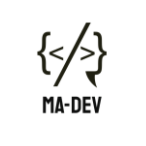